[EP03] 나의 첫 번째 캐글 경진대회, 무작정 따라해보기
    3-13. 프로젝트 : This is your playground! Leaderboard를 정복해 주세요!


##목차##

(1) 데이터 가져오기

(2) 디렉토리 설정

(3) 데이터 이해하기

(4) 데이터 전처리

(5) 모델 준비하기

(6) 교차검증

(7) 예측값 생성

(8) 하이퍼 파라미터인 학습률 설정하기
(9) 모델 학습하기
(10) test 데이터에 대한 성능 확인하기
(11) 정답 데이터와 예측한 데이터 시각화하기


✓ 튜닝해볼 수 있는 모델 클래스 인자
대표적으로 자주 튜닝하는 lightgbm 라이브러리의 인자는 다음과 같습니다.

max_depth : 의사 결정 나무의 깊이, 정수 사용
learning_rate : 한 스텝에 이동하는 양을 결정하는 파라미터, 보통 0.0001~0.1 사이의 실수 사용
n_estimators : 사용하는 개별 모델의 개수, 보통 50~100 이상의 정수 사용
num_leaves : 하나의 LightGBM 트리가 가질 수 있는 최대 잎의 수
boosting_type : 부스팅 방식, gbdt, rf 등의 문자열 입력
위에서 저는 n_estimators와 max_depth 에 대해서만 아주 간단하게 실험했지만, 훨씬 더 다양하게 실험을 하며 최적의 조합을 찾아볼 수 있습니다.
실제로 lightgbm에 넣을 수 있는 인자는 아래 자료들에서 설명하는 것처럼 매우 다양합니다.

lightGBM / XGBoost 파라미터 설명
Chapter 4. 분류 - LightGBM
위의 자료 외에도 lightgbm, xgboost 하이퍼 파라미터 튜닝 키워드로 검색해보면 다양한 하이퍼 파라미터의 종류를 확인할 수 있습니다.

실험 과정에서는 물론 위에서 만들었던 my_GridSearch(), save_submission() 등의 함수를 사용해도 되고, 혹은 여러분이 원하는 새로운 함수를 만들어서 사용해도 됩니다!

✓ 시도해볼 수 있는 방법
여러분이 시도해볼 수 있는 방법은 다음과 같은 것들이 있습니다.

기존에 있는 데이터의 피처를 모델을 보다 잘 표현할 수 있는 형태로 처리하기 (피처 엔지니어링)
LGBMRegressor, XGBRegressor, RandomForestRegressor 세 가지 이상의 다양한 모델에 대해 하이퍼 파라미터 튜닝하기
다양한 하이퍼 파라미터에 대해 그리드 탐색을 시도해서 최적의 조합을 찾아보기
Baseline 커널에서 활용했던 블렌딩 방법 활용하기
물론 이 외에도 좋은 아이디어가 있다면 당연히 시도해보는 것도 좋습니다. 자유롭게 여러 가지 방법을 활용해서 점수를 끌어올려 보세요!
참고로, 진행하면서 도움이 될 수 있는 가장 좋은 자료는 이미 대회를 진행한 사람들이 올려둔 커널입니다.

https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/notebooks
아주 다양하게 데이터를 탐색해 본 커널도 있고, 상위권을 달성한 커널은 오늘 다루지 않은 스태킹 앙상블(stacking ensemble) 등의 기법을 활용한 커널을 활용하기도 합니다. 한 번씩 구경해보고 다른 사람들은 어떤 전략으로 성능을 끌어올렸는지 공부해보는 것도 매우 좋을 겁니다!

여러 가지 실험을 해보고 결과 csv는 캐글에, 사용한 노트북은 깃허브(GitHub)를 통해 이곳에 제출해 주세요. 제출한 노트북에는 본인의 캐글 Submission 스코어를 기재해 주시기 바랍니다.

그럼, 시작해보죠! 화이팅!!! 💪🏼


✓프로젝트 루브릭
데이터 전처리, 모델학습, 예측의 전체 과정을 거쳐 캐글 submission까지 전과정이 성공적으로 진행되었는가?
제출된 노트북이 캐글 커널로 사용될 수 있을 만큼 전처리, 학습, 최적화 진행 과정이 체계적으로 기술되었는가?
다양한 피처 엔지니어링과 하이퍼 파라미터 튜닝 등의 최적화 기법을 통해 캐글 리더보드의 Private score 기준 110000 이하의 점수를 얻었는가?

In [14]:
#(1) 데이터 가져오기#

import os
from os.path import join
import xgboost as xgb
import lightgbm as lgb
import missingno as msno
import sklearn
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score



In [16]:
#(2)디렉토리 설정
os.chdir('C:/Users/ASUS/OneDrive/문서/VScode/kaggle_kakr_housing')
print(os.getcwd())
data_dir = os.getenv('C:/Users/ASUS/OneDrive/문서/VScode/kaggle_kakr_housing')
train_data_path = join('C:/Users/ASUS/OneDrive/문서/VScode/kaggle_kakr_housing', 'train.csv')
sub_data_path = join('C:/Users/ASUS/OneDrive/문서/VScode/kaggle_kakr_housing', 'test.csv')

print(train_data_path)
print(sub_data_path)

C:\Users\ASUS\OneDrive\문서\VScode\kaggle_kakr_housing
C:/Users/ASUS/OneDrive/문서/VScode/kaggle_kakr_housing\train.csv
C:/Users/ASUS/OneDrive/문서/VScode/kaggle_kakr_housing\test.csv


LMS상이 아닌 개인 디렉토리에서 실행하기 위해 디렉토리를 로컬로 바꿔주었다.
os.chdir은 시스템상의 디렉토리를 설정해주는 함수이다.

In [17]:
#(3)데이터 이해하기
data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)
print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))

y = data['price']
del data['price']

print(data.columns)
data.head()

train data dim : (15035, 21)
sub data dim : (6468, 20)
Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


-트레인데이터는 약 1만5천개, 테스트데이터 약 6천5백개
-테스트데이터의 세번째 컬럼인 Price는 y로 대체 후 지웠기 때문에 컬럼이 20개로 트레인 컬럼보다 하나 작다.



1. ID : 집을 구분하는 번호
2. date : 집을 구매한 날짜
3. price : 타겟 변수인 집의 가격        ##y = data['price']로 y에 저장해두었습니다, y = price 입니다.
4. bedrooms : 침실의 수
5. bathrooms : 침실당 화장실 개수
6. sqft_living : 주거 공간의 평방 피트
7. sqft_lot : 부지의 평방 피트
8. floors : 집의 층수
9. waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
10. view : 집이 얼마나 좋아 보이는지의 정도
11. condition : 집의 전반적인 상태
12. grade : King County grading 시스템 기준으로 매긴 집의 등급
13. sqft_above : 지하실을 제외한 평방 피트
14. sqft_basement : 지하실의 평방 피트
15. yr_built : 집을 지은 년도
16. yr_renovated : 집을 재건축한 년도
17. zipcode : 우편번호
18. lat : 위도
19. long : 경도
20. sqft_living15 : 가장 가까운 이웃 15개에 대한 내부 주택 생활 공간 의 평방 피트
21. sqft_lot15 : 가장 가까운 이웃 15개 토지의 면적

<AxesSubplot:>

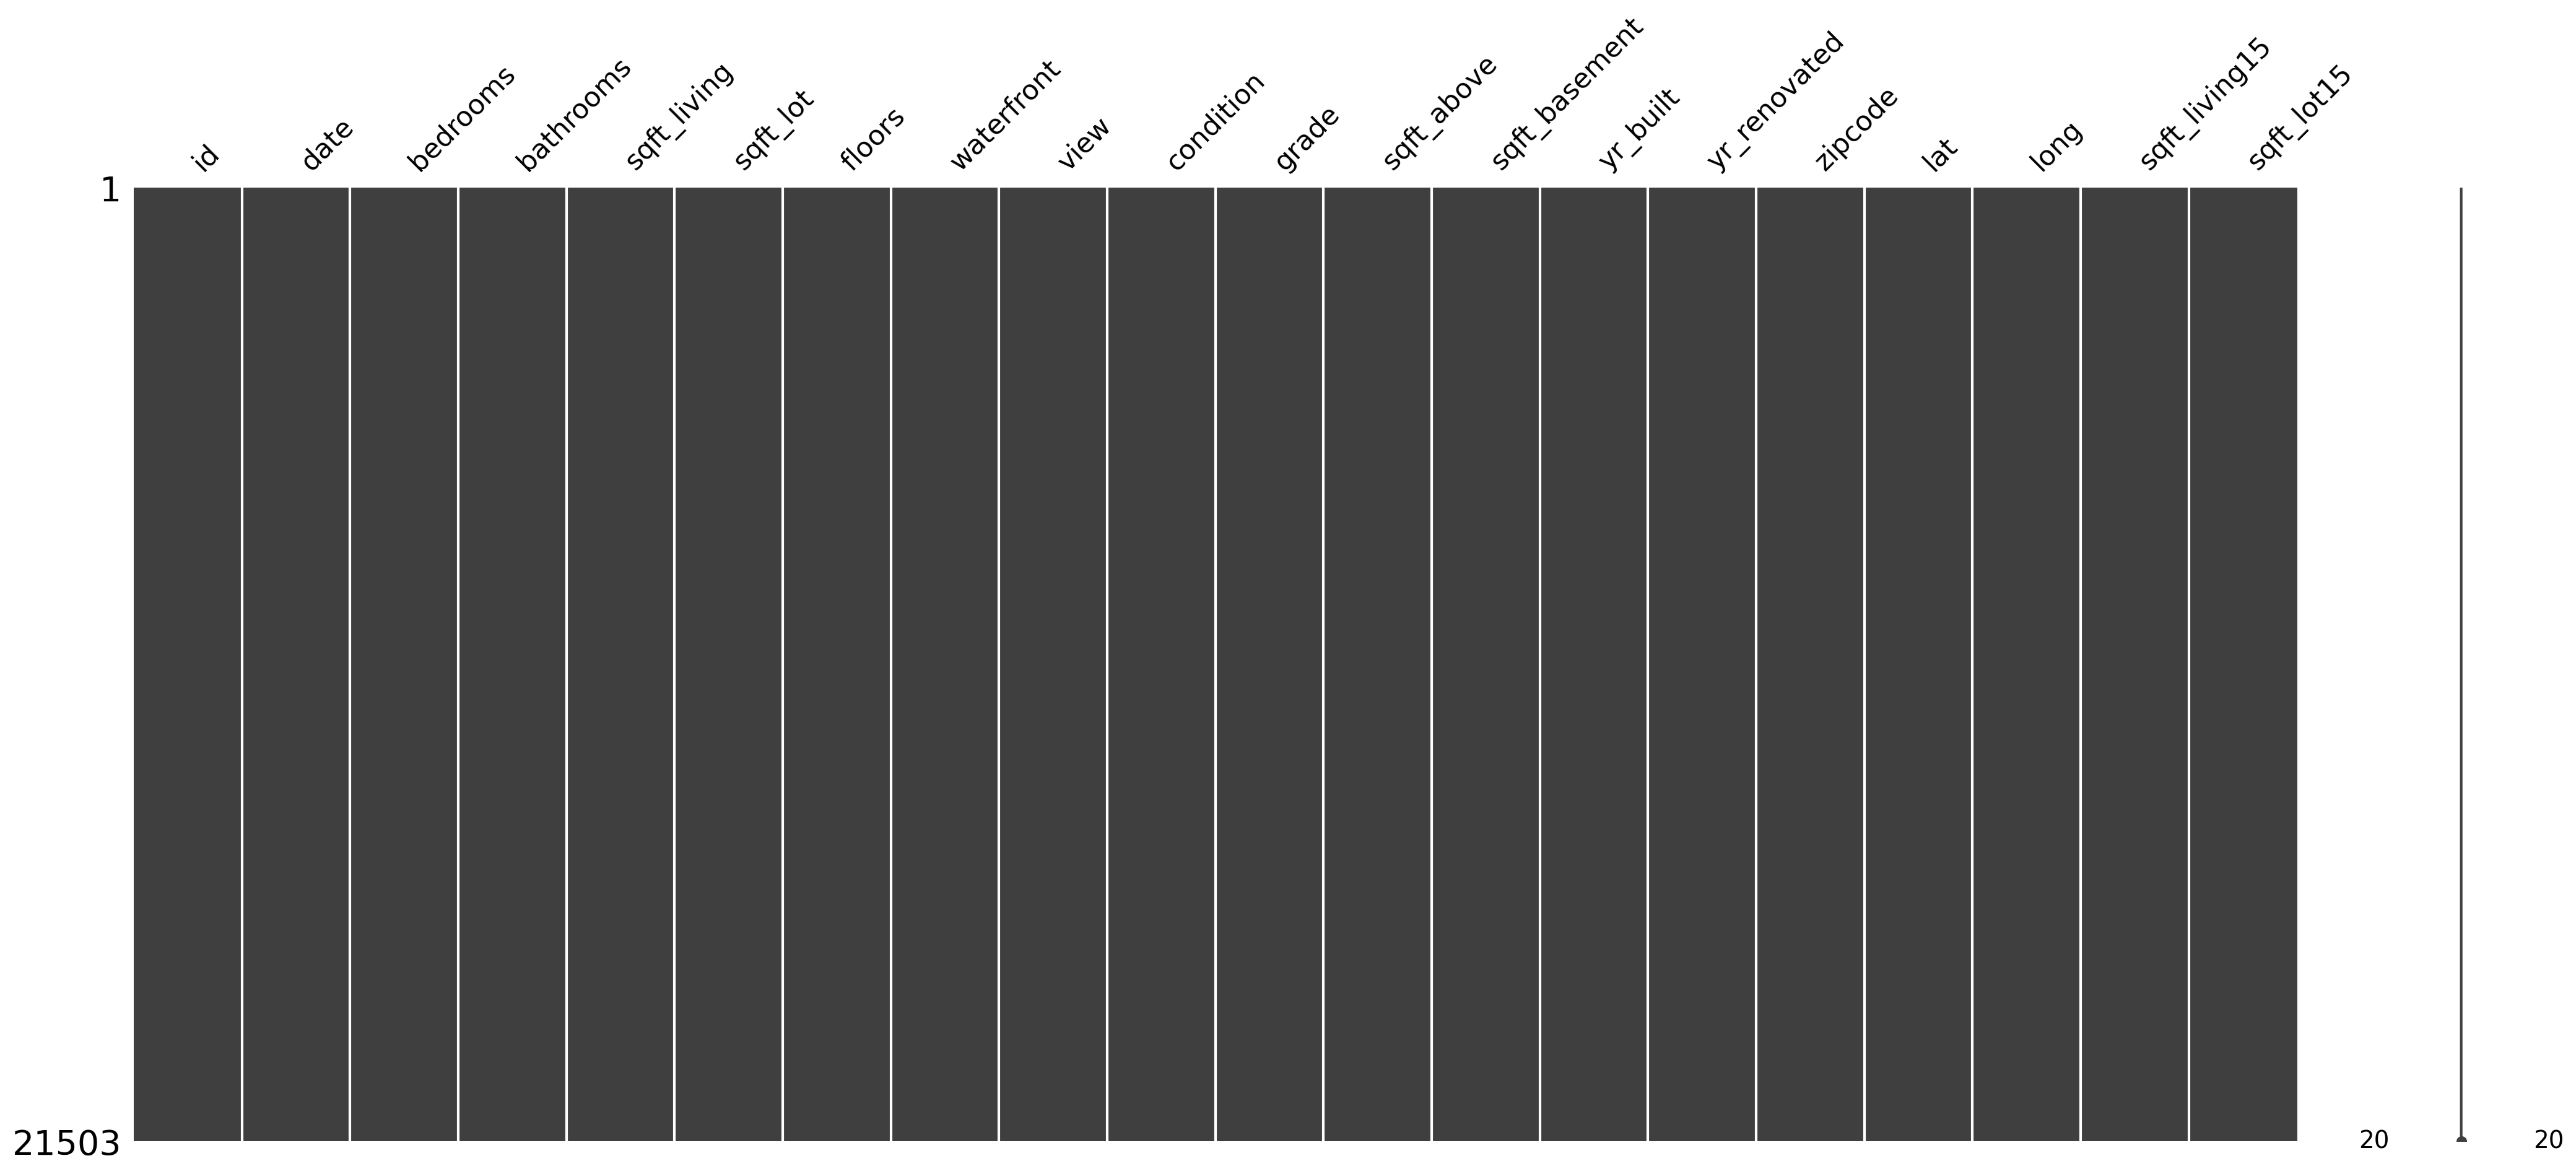

In [18]:
#(4)데이터 전처리

train_len = len(data)
data = pd.concat((data, sub), axis=0)

msno.matrix(data)

전처리를 위하여 트레인 데이터와 테스트 데이터를 합친 후 missingno 라이브러리의 matrix 함수로 데이터 결측 상태를 시각화 하여 볼수있다.
NaN이라는 결측치가 있다면 흰색으로 출력 없다면 검은색으로 출력.


In [19]:
sub_id = data['id'][train_len:]
del data['id']

print(data.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


필요 없는 id 칼럼 제거, 나중을 대비하여sub_id변수로 백업해둠.

In [20]:
data['date'] = data['date'].apply(lambda x : str(x[:6]))

data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


date(날짜)의 데이터들에서 필요없는 뒷부분 삭제

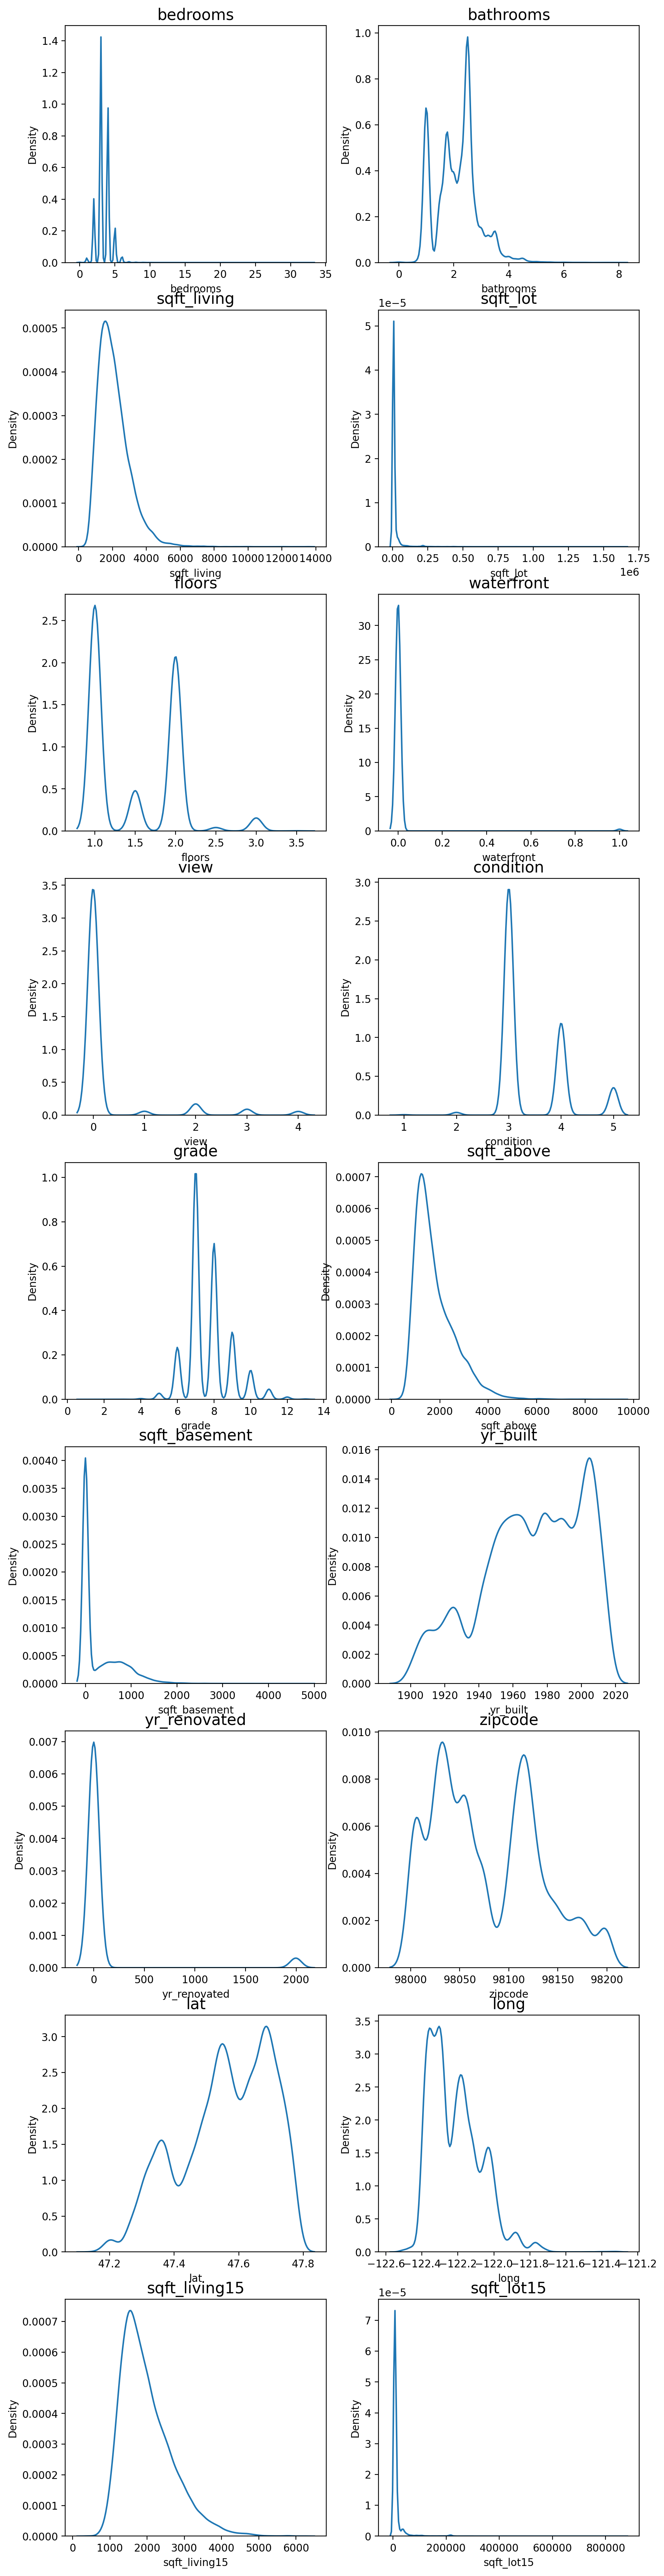

In [21]:
fig, ax = plt.subplots(9, 2, figsize=(10, 44))

count = 1                   # id 변수(count==0인 경우)는 제외하고 분포를 확인합니다.
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

치우친 분포를 가진 피쳐가 있는지 확인하고 수정해주기 위해 19개의 피쳐를 시각화했고 분포를 확인할수 있다.

자료를 보면 1.bedrooms, 3.sqft_living, 4.sqft_lot, 10.sqft_above, 11.sqft_basement, 17.sqft_living15, 18.sqft_lot15 그래프들이 한쪽으로 치우쳐짐을 확인.

In [22]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

로그 스케일링으로 분포도를 다듬어준다.

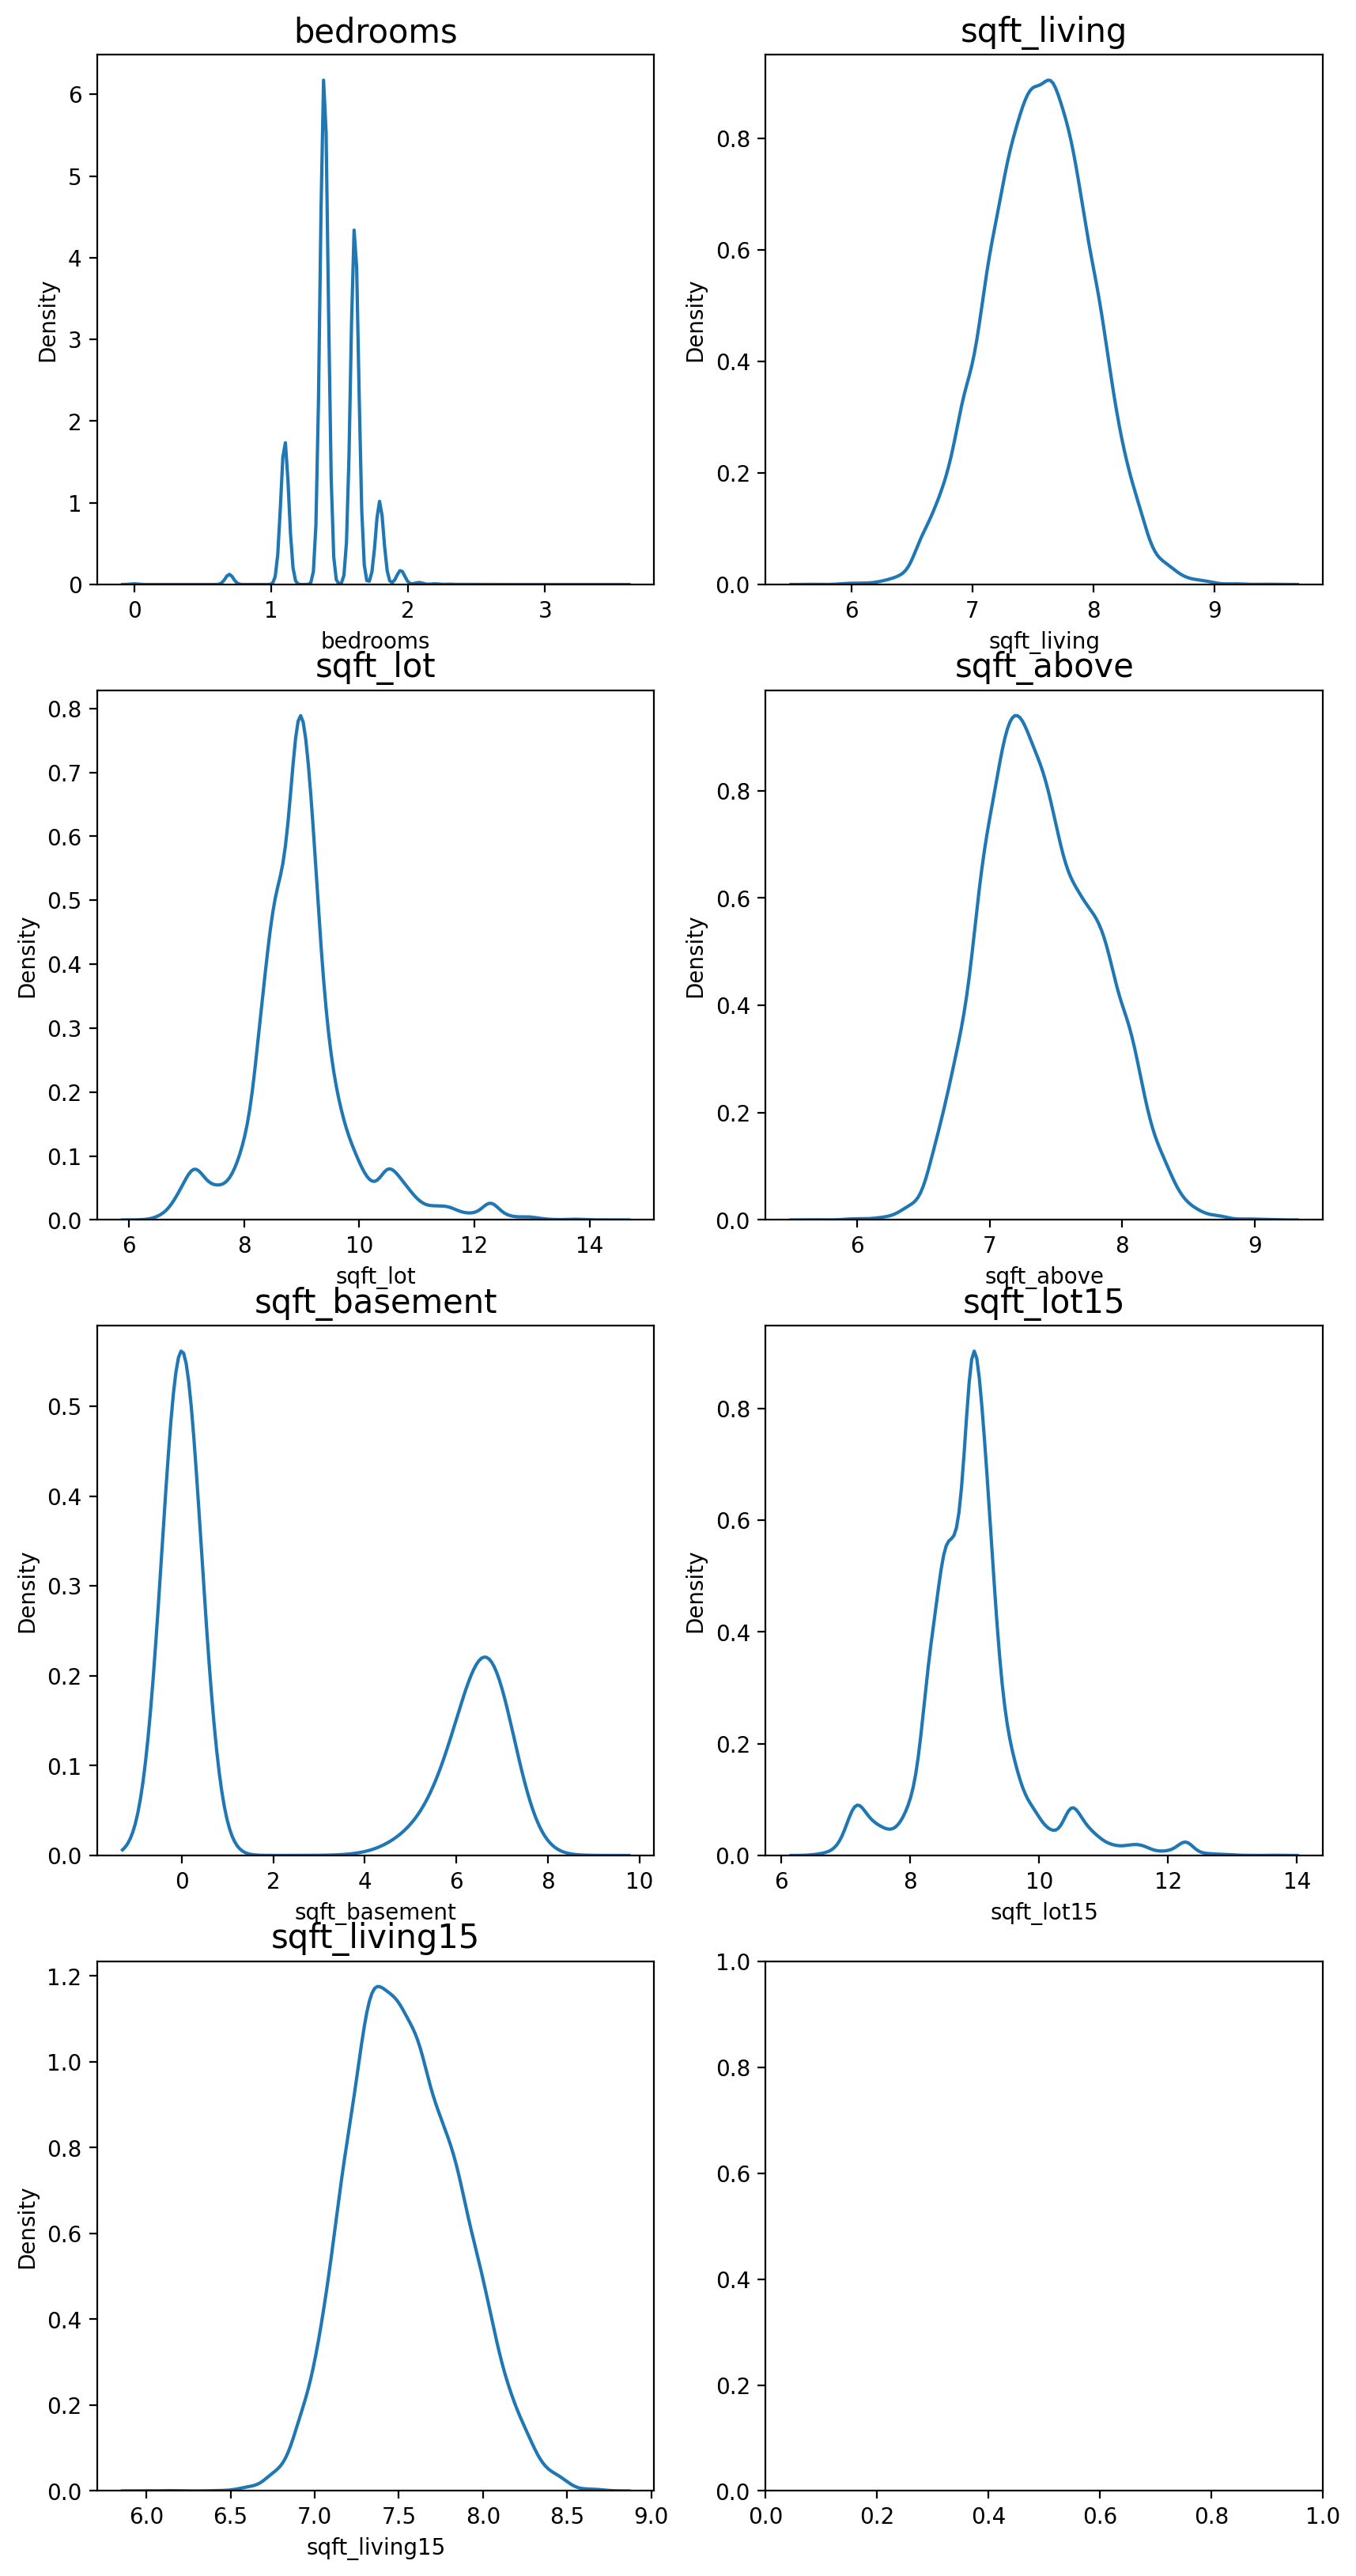

In [23]:
fig, ax = plt.subplots(4, 2, figsize=(10, 20))

count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(data=data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1

'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15'의 분포도가 다듬어졌음을 확인.

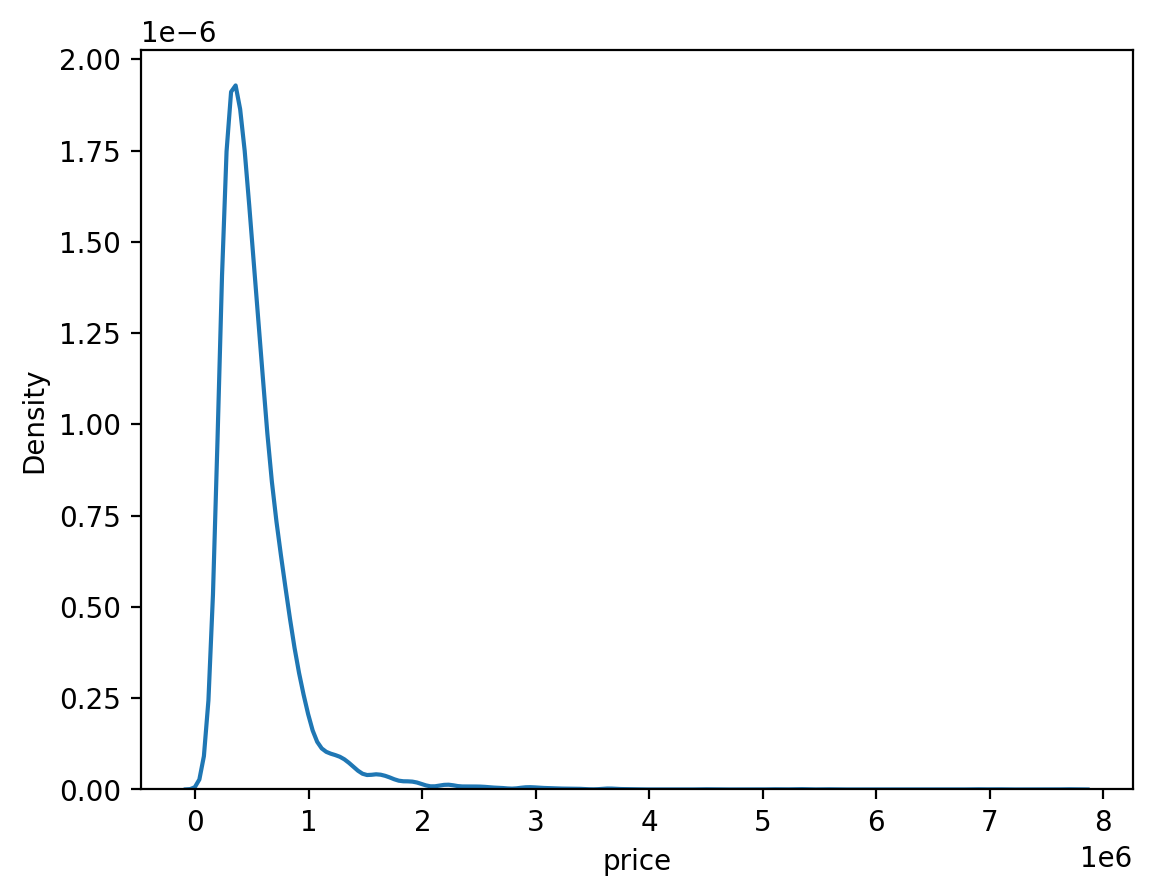

In [24]:
sns.kdeplot(y)
plt.show()

타겟데이터 y 인 price 항목도 시각화 하여 분포도를 확인해주는데 역시 치우쳐있음을 확인.

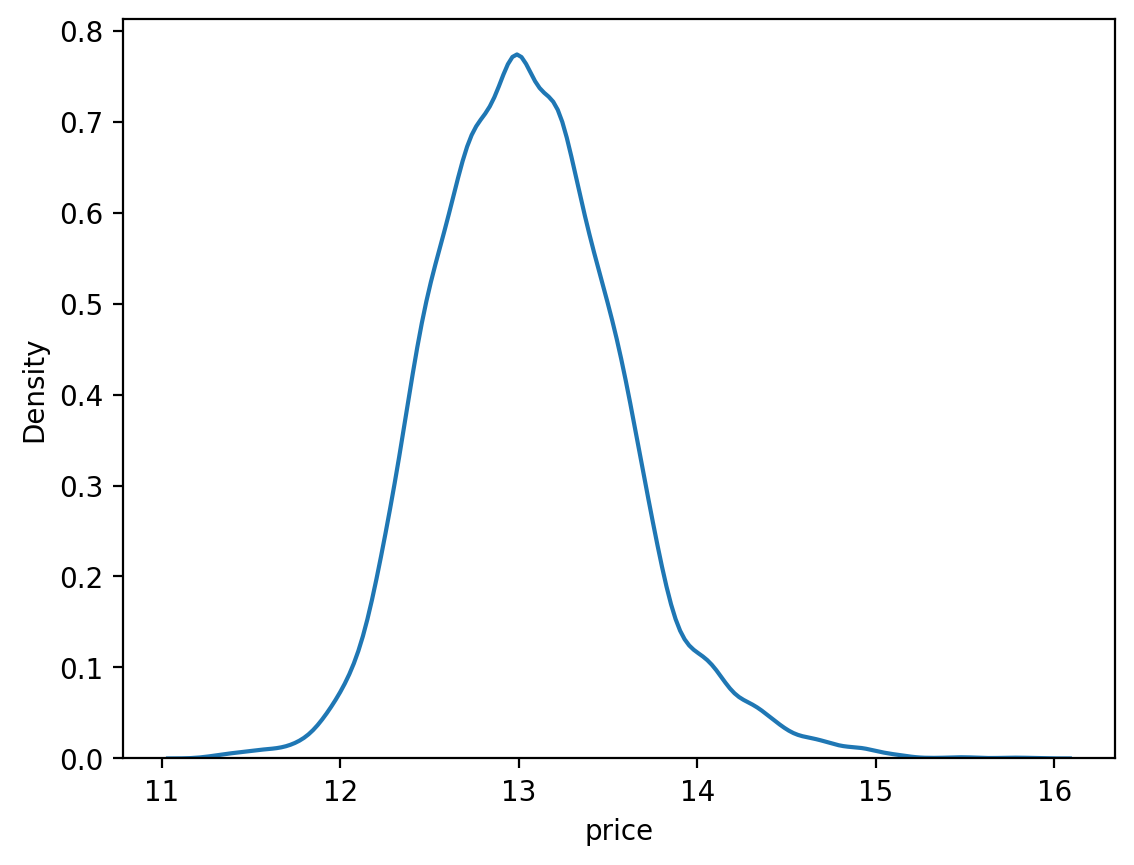

In [25]:
y_log_transformation = np.log1p(y)

sns.kdeplot(y_log_transformation)
plt.show()

역시 로그변환으로 스케일링 해주었고 시각화하여 확인해보면 거의 정규분포도처럼 잘 다듬어졌다.

In [26]:
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

print(x.shape)
print(sub.shape)

(15035, 19)
(6468, 19)


데이터 전처리 시작과 함께 합쳐두었던 트레인 데이터와 테스트 데이터를 분리해야하는데
트레인 데이터를 x에 테스트 데이터를 sub 변수에 저장한다.

In [27]:
#(5) 모델 준비하기

gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

부스팅계열 모델 gboost, xgboost, lightgbm 세가지로 평균블렌딩average blending <앙상블>할 예정이다.

In [29]:
#(6)교차검증
def get_cv_score(models):
    kfold = KFold(n_splits=5).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")

get_cv_score(models)

Model: GradientBoosting, CV score:0.8598
Model: XGBoost, CV score:0.8860
Model: LightGBM, CV score:0.8819


교차검증을 통해 모델의 성능 평가.

회귀모델이 주어진 자료에 얼마나 적합한지 평가하였고 0~의 값을 가지며 1에 가까울 수록 좋은 점수.

In [9]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)


AveragingBlending() 함수로 각 모델에 대한 예측 결과를 평균 내주었다.
models 딕셔너리 모델을 모두 x와 y로 학습하고 predictions에 그 예측 결괏값을 모아서 평균한 값을 반환.

In [32]:
#(7)예측값 생성
y_pred = AveragingBlending(models, x, y, sub)
print(len(y_pred))
y_pred

6468


array([ 529966.66304912,  430726.21272617, 1361676.91242777, ...,
        452081.69137012,  341572.97685942,  421725.1231835 ])

예측값 생성!

In [33]:
result = pd.DataFrame({
    'id' : sub_id, 
    'price' : y_pred
})

result.head()

,id,price
0,15035,5.299667e+05
1,15036,4.307262e+05
2,15037,1.361677e+06
3,15038,3.338036e+05
4,15039,3.089006e+05


id와 price 두가지 열로 구성된 데이터로 정렬

In [ ]:
my_submission_path = join(data_dir, 'submission.csv')
result.to_csv(my_submission_path, index=False)

print(my_submission_path)

submission.csv 파일로 저장!